# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [29]:
import pandas as pd
import pickle
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("../")
from src import funciones_problemas_regresion as fpr

In [2]:
df =  pd.read_csv("../datos/df_madrid_nonulls_encoded_sinout_estand.csv", index_col=0).reset_index(drop=True)
variable_respuesta = "price"

df.head()

,price,size_standar,municipality_standar,distance_standar,floor_standar,hasLift_standar,rooms_0_standar,rooms_1_standar,rooms_2_standar,rooms_3_standar,...,bathrooms_3_standar,propertyType_chalet_standar,propertyType_countryHouse_standar,propertyType_duplex_standar,propertyType_flat_standar,propertyType_penthouse_standar,propertyType_studio_standar,exterior_True_standar,price_robust,price_minmax
0,750.0,0.178464,0.738475,-0.682481,0.472951,0.951320,-0.411054,1.350926,-0.764272,-0.391230,...,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103,0.555556,1.000000
1,750.0,0.741247,0.276478,0.001239,-0.972445,-0.789256,-0.411054,-0.740233,1.308434,-0.391230,...,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103,0.555556,1.000000
2,400.0,0.572412,-4.815161,2.921085,0.355032,-0.789256,-0.411054,-0.740233,1.308434,-0.391230,...,0.0,-0.054393,-0.054393,-0.199693,-1.908883,5.735852,-0.406138,0.473103,-3.333333,0.000000
3,590.0,0.741247,-2.114161,3.037816,-1.600627,-0.789256,-0.411054,-0.740233,-0.764272,2.556039,...,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103,-1.222222,0.542857
4,684.0,-0.665712,0.738475,-0.410810,-1.600627,-2.446523,2.432769,-0.740233,-0.764272,-0.391230,...,0.0,-0.054393,-0.054393,-0.199693,-1.908883,-0.174342,2.462214,0.473103,-0.177778,0.811429


Probaremos varios modelos de ensamble y compararemos sus métricas a ver cual es el que arroja mejores resultados.

## Random Forest Regressor

In [ ]:
variable_respuesta = "price"
modelo = "RandomForestRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [50, 100, 150], #número de árboles que queremos en el bosque
    'max_depth': [15, 20, 30],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [15, 20, 25], 
    'max_leaf_nodes': [100, 200, 300]
}

df_metricas, modelo_random_forest_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 15, 'max_leaf_nodes': 100, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 50}


In [ ]:
variable_respuesta = "price"
modelo = "RandomForestRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [40, 50, 60], #número de árboles que queremos en el bosque
    'max_depth': [10, 15, 20],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [10, 15, 20], 
    'max_leaf_nodes': [70, 80, 100]
}

df_metricas, modelo_random_forest_2 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 10, 'max_leaf_nodes': 70, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 60}


,r2_scores,MAE,MSE,RMSE
train,0.961296,3.543809,138.956732,11.787991
test,0.948032,4.928132,221.821024,14.893657


In [7]:
variable_respuesta = "price"
modelo = "RandomForestRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'max_depth': [7, 10, 15],
    'max_leaf_nodes': [60, 70, 80],
    'min_samples_leaf': [7, 10, 15],
    'min_samples_split': [7, 10, 15],
    'n_estimators': [50, 60, 70] #número de árboles que queremos en el bosque
}

df_metricas, modelo_random_forest_3 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 7, 'max_leaf_nodes': 60, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 60}


,r2_scores,MAE,MSE,RMSE
train,0.968434,2.874384,113.329443,10.645630
test,0.962809,3.754649,158.746727,12.599473


In [8]:
# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'max_depth': [5, 7, 10],
    'max_leaf_nodes': [50, 60, 70],
    'min_samples_leaf': [5, 7, 10],
    'min_samples_split': [5, 7, 10],
    'n_estimators': [50, 60, 70] #número de árboles que queremos en el bosque
}

df_metricas, modelo_random_forest_4 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 5, 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 70}


,r2_scores,MAE,MSE,RMSE
train,0.972351,2.513605,99.268848,9.963375
test,0.968939,3.249665,132.580301,11.514352


In [9]:
# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'max_depth': [4, 5, 6],
    'max_leaf_nodes': [40, 45, 50],
    'min_samples_leaf': [4, 5, 6],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [60, 65, 70] #número de árboles que queremos en el bosque
}

df_metricas, modelo_random_forest_5 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 70}


,r2_scores,MAE,MSE,RMSE
train,0.980078,1.920207,71.527080,8.457368
test,0.978346,2.572635,92.429675,9.614035


Tras varios intentos ajustando las métricas hemos obtenido un RMSE de 8.54 para train y 8.61 para test lo cual es increiblemente bueno. En cuanto al r2 el train tiene 0.98 y el test 0.97 siendo también parametros muy acertados. Por lo que hemos obtenido un modelo muy satisfactorio usando RandomForestRegressor. Probemos con más modelos.

## Gradient Boosting Regressor

In [10]:
modelo = "GradientBoostingRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'max_depth': [4, 5, 6],
    'max_leaf_nodes': [40, 45, 50],
    'min_samples_leaf': [4, 5, 6],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [60, 65, 70] #número de árboles que queremos en el bosque
}

df_metricas, modelo_grad_boosting_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con GradientBoostingRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 4, 'max_leaf_nodes': 40, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 60}


,r2_scores,MAE,MSE,RMSE
train,0.995449,0.764296,16.340987,4.042399
test,0.998904,0.817594,4.679764,2.163276


In [11]:
modelo = "GradientBoostingRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'max_depth': [3, 4, 5, 6],
    'max_leaf_nodes': [20, 25, 30],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3, 4, 5, 6],
    'n_estimators': [60, 61, 62, 63, 64, 65] #número de árboles que queremos en el bosque
}

df_metricas, modelo_grad_boosting_2 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con GradientBoostingRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 60}


,r2_scores,MAE,MSE,RMSE
train,0.998170,0.656476,6.570218,2.563244
test,0.997037,1.100479,12.646434,3.556183


In [3]:
modelo = "GradientBoostingRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'max_depth': [3, 4, 5, 6],
    'max_leaf_nodes': [20, 25, 30],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3, 4, 5, 6],
    'n_estimators': [60, 61, 62, 63, 64, 65] #número de árboles que queremos en el bosque
}

df_metricas, modelo_grad_boosting_3 = clase_arbol.grid_search(params_rf, cv=5)
df_metricas

Calculando el modelo con GradientBoostingRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 65}


,r2_scores,MAE,MSE,RMSE
train,0.998364,0.586525,5.873811,2.423595
test,0.997117,1.021533,12.304688,3.507804


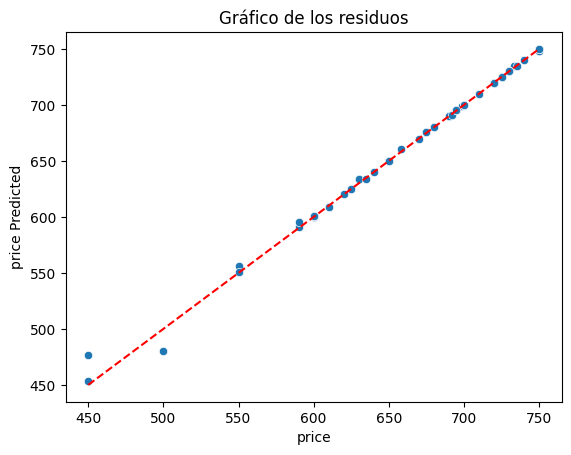

In [4]:
clase_arbol.visualizacion_residuos()

In [5]:
pd.DataFrame((df.describe().T).iloc[0,:]).T

,count,mean,std,min,25%,50%,75%,max
price,339.0,692.377581,61.804274,400.0,650.0,700.0,740.0,750.0


In [8]:
error = 100*3.5/700
print(f"Nos estamos confundiendo de media en un {error}% al estimar el precio del alquiler de la vivienda, tomando de referencia la mediana.")

Nos estamos confundiendo de media en un 0.5% al estimar el precio del alquiler de la vivienda, tomando de referencia la mediana.


Las métricas son practicamente inmejorables, tanto el train como el test tienen un R2 de 0.99 y en cuento al RMSE tenemos 2.4 para train y 3.5 para test. Viendo el gráfico de los residuos podríamos incluso mejorarlo si quitasemos las casas de menos de 550 euros, pero como ya es suficientemente bueno vamos a mantenerlas. Estas métricas no muestran ningún problema de overfitting ni underfitting por lo que tenemos un modelo bastante óptimo para la predicción del precio de las casas de Madrid.

In [6]:
with open('../datos/modelos/modelo_grad_boosting.pkl', 'wb') as f:
    pickle.dump(modelo_grad_boosting_3, f)

# XGBRegressor

Probaremos este modelo de predicción simplemente por comprobar qué métricas nos da, aunque las obtenidas anteriormente ya sean suficientemente buenas.

In [11]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [60, 65, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight':  [3, 4, 5, 6],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 60, 'subsample': 0.8}


,r2_scores,MAE,MSE,RMSE
train,0.992920,0.919284,25.418056,5.041632
test,0.994341,1.449843,24.154566,4.914729


In [12]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [50, 55, 60],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight':  [3, 4, 5, 6],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 0.9, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 55, 'subsample': 0.8}


,r2_scores,MAE,MSE,RMSE
train,0.992869,0.999958,25.602434,5.059885
test,0.994604,1.522214,23.030645,4.799025


Son métricas bastante buenas, sin embargo, las obtenidas anteriormente son mejores, por lo tanto nos quedamos con el modelo anterior.

_______________________________

# Modelo final

Ahora vamos a entrenar a nuestro modelo con todos los datos:

In [34]:
with open('../datos/modelos/modelo_grad_boosting.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)

X  = df.drop(columns=variable_respuesta)
y = df[[variable_respuesta]]
modelo_cargado.fit(X, y)

GradientBoostingRegressor(max_leaf_nodes=20, min_samples_leaf=3,
                          min_samples_split=3, n_estimators=65,
                          random_state=42)

In [35]:
y_train_pred = modelo_cargado.predict(X)
r2 = round(r2_score(y,  y_train_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y,  y_train_pred)), 2)
print(f"Tenemos un r2 score de {r2} y un RMSE de {rmse}.")

Tenemos un r2 score de 1.0 y un RMSE de 1.17.


In [36]:
with open('../datos/modelos/modelo_prediccion_final.pkl', 'wb') as f:
    pickle.dump(modelo_cargado, f)